In [1]:
import pandas as pd
from sqlalchemy import create_engine
import numpy as np
import sqlalchemy as sqlalchemy


In [2]:
rds_connection_string = "postgres:Platinum9823#@localhost:5432/finalp_db"
engine = create_engine(f'postgresql://{rds_connection_string}')

In [3]:
engine.table_names()

['review_info', 'movie_info']

In [4]:
movie_info=pd.read_sql_query('select * from movie_info', con=engine)

In [5]:
review_info=pd.read_sql_query('select * from review_info', con=engine)

In [6]:
movie_info

,movie_id,movie_title,rating,nreviews,genre,genre1,genre2,genre3
0,tt9140560,WandaVision,8.3,69400.0,Action Comedy Drama,Action,Comedy,Drama
1,tt11192306,Superman and Lois,8.1,3982.0,Action Adventure Drama,Action,Adventure,Drama
2,tt9184982,Tribes of Europa,6.8,5120.0,Action Adventure Drama,Action,Adventure,Drama
3,tt2560140,Attack on Titan,8.9,204699.0,Animation Action Adventure,Animation,Action,Adventure
4,tt0944947,Game of Thrones,9.3,1777156.0,Action Adventure Drama,Action,Adventure,Drama
...,...,...,...,...,...,...,...,...
3834,tt2040560,The Pact,5.7,23486.0,Horror Mystery Thriller,Horror,Mystery,Thriller
3835,tt0105459,Split Second,6.2,12590.0,Action Crime Horror,Action,Crime,Horror
3836,tt4798836,Bad Hair,5.6,2235.0,Comedy Horror,Comedy,Horror,None
3837,tt0044121,The Thing from Another World,7.1,26023.0,Horror Sci-Fi,Horror,Sci-Fi,None


In [9]:
review_info

,movie_id,rating_ind,rating_text
0,tt11192306,8.0,I am not a fan of CW superhero tv series since...
1,tt11192306,9.0,Being that this is a Berlanti CW show I was NO...
2,tt9184982,7.0,It's hard for me to get into shows in a foreig...
3,tt9184982,9.0,On a plus side :well litnice characterization/...
4,tt9184982,8.0,I watched the first three episodes. Not becaus...
...,...,...,...
2937,tt0435705,8.0,When a group of terrorists threatens to explod...
2938,tt0435705,9.0,Nicolas Cage is comfortable playing Las Vegas ...
2939,tt0435705,2.0,"Oh Hollywood, Hollywood, Hollywood, why can't ..."
2940,tt0435705,7.0,I just went to see it this morning and a huge ...


In [28]:
array=[]

In [29]:
# top 6 genres by the total number of movies
top6_genre = (movie_info.iloc[:, 4:-1] # get the genre columns only
              .sum() # sum them up
              .sort_values(ascending=False) # sort descending
              .head(6) # get the first 6
              .index.values # get the genre names
              )

top6_genre

array([], dtype=object)

In [33]:
movie_info.dtypes

movie_id        object
movie_title     object
rating         float64
nreviews       float64
genre           object
genre1          object
genre2          object
genre3          object
dtype: object

In [39]:
movie_info['rating'].value_counts()

7.3    156
6.6    148
7.5    142
7.6    142
7.0    139
      ... 
2.5      1
3.5      1
9.6      1
1.8      1
2.7      1
Name: rating, Length: 74, dtype: int64

In [40]:
movie_info['rating'].describe()

count    3839.000000
mean        6.971503
std         1.115884
min         1.800000
25%         6.300000
50%         7.100000
75%         7.800000
max         9.700000
Name: rating, dtype: float64

<AxesSubplot:>

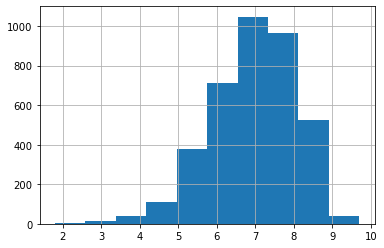

In [41]:
movie_info['rating'].hist(bins=10)

<AxesSubplot:>

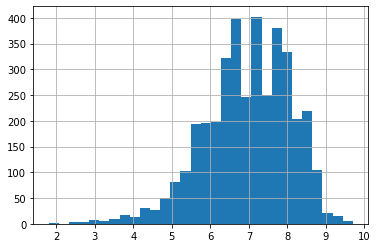

In [42]:
movie_info['rating'].hist(bins=30)


In [43]:
f"You have {len(review_info.movie_id.unique())} unique movie ids in the data"

'You have 556 unique movie ids in the data'

In [46]:
movies_rating = (review_info
                  .set_index("movie_id")
                  .join(movie_info.set_index("movie_id"),
                        how="left")
                 )

movies_rating.head(2)

,rating_ind,rating_text,movie_title,rating,nreviews,genre,genre1,genre2,genre3
movie_id,,,,,,,,,
tt0047478,9.0,After getting used to shoot-em-up action flick...,Seven Samurai,8.6,317416.0,Action Adventure Drama,Action,Adventure,Drama
tt0047478,7.0,Shichinin no samurai is a quintessential Kuros...,Seven Samurai,8.6,317416.0,Action Adventure Drama,Action,Adventure,Drama


In [58]:
dummies = movie_info['genre3'].str.get_dummies()
dummies.head()

,Action,Adventure,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,...,Musical,Mystery,Reality-TV,Romance,Sci-Fi,Sport,Talk-Show,Thriller,War,Western
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
